In [1]:
import sys
sys.path.append('/central/home/xjw/workdir/qkid/PAA-KIPM-vna')
from utils.plotVNA import *
from utils.findPeak import *

/central/home/xjw/workdir/qkid/PAA-KIPM-vna/notebooks


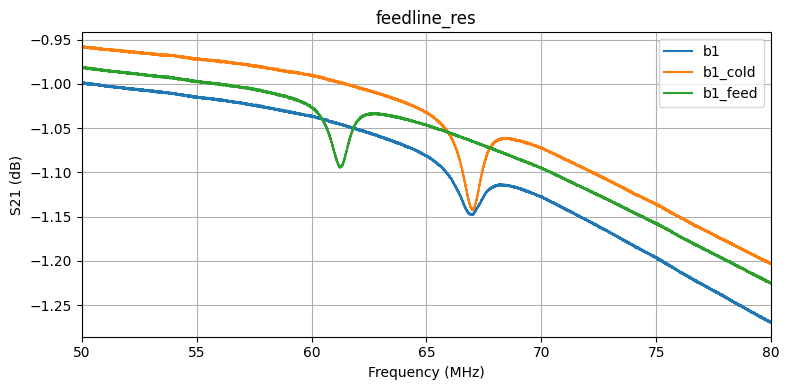

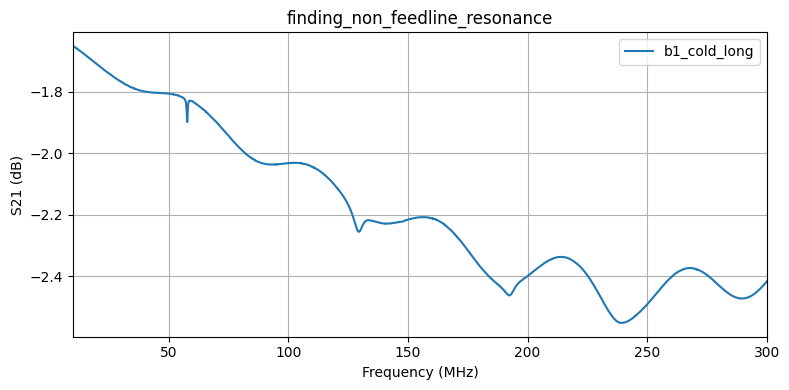

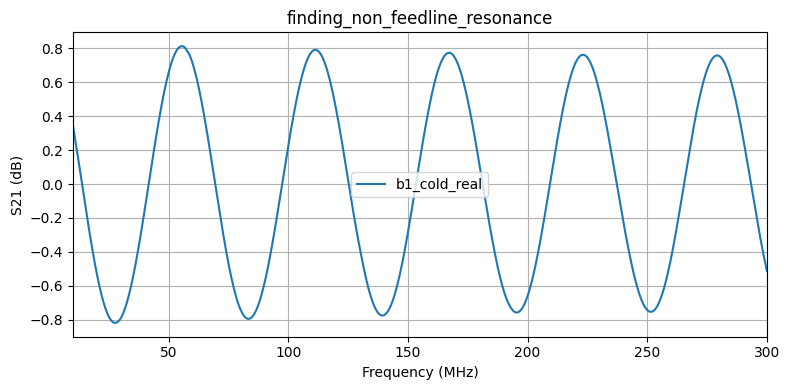

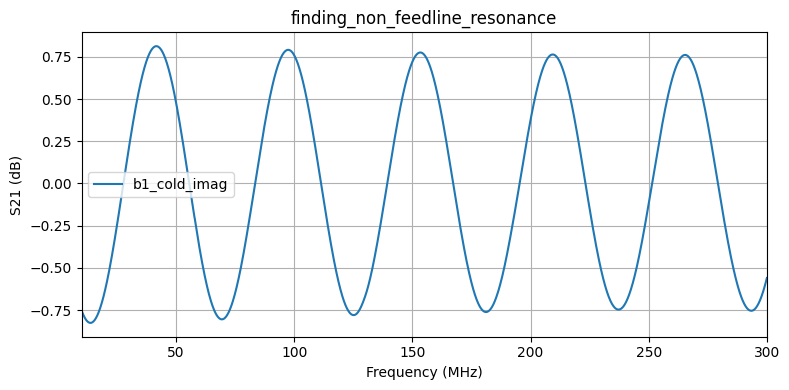

In [2]:
# resonance found 
folder = '/central/home/xjw/workdir/qkid/PAA-KIPM-vna/data/2025-6-23-pcb-cold/'
output_path = '/central/home/xjw/workdir/qkid/PAA-KIPM-vna/output/2025-6-24-pcb-feedline/'

folder_feedline = '/central/home/xjw/workdir/qkid/PAA-KIPM-vna/data/2025-6-24-pcb-testmore/'
# b1_cold = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_resfound60mhz'+'.csv'
# b1_warm = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_resfound60mhz'+'.csv'
# b2_warm = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_B2_ROOM_resmaybe_ZOOM'+'.csv'
# b2_cold = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_B2_cold_resmaybe_ZOOM'+'.csv'
# b3_cold = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_B3_cold_resmaybe_ZOOM'+'.csv'

b1_warm = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_B1_room-test2'+'.csv'
b1_cold = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_B1_cold-test2'+'.csv'

b1_feed = folder_feedline+'2025_6_24_xjw_noise_trace_ifbw_1000_hz_3dbm_feedline_res'+'.csv'
# b1_warm_short = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_B1_room_shortcable-nores'+'.csv'
# b1_warm_mid = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_B1_room_midcable-nores'+'.csv'
# b1_warm_long_unstable = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_B1_room_longcable-unstableres'+'.csv'
# b2_warm = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_B2_room-test2'+'.csv'
# b2_cold = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_B2_cold-test2'+'.csv'
# b3_warm = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_B3_room-test2'+'.csv'
# b3_cold = folder+'2025_6_23_xjw_noise_trace_ifbw_1000_hz_3dbm_B3_cold-test2'+'.csv'

b1_cold_long = folder_feedline+'2025_6_24_xjw_vna_ifbw_100_hz_3dbm_ave_4_cold_b1'+'.csv'
b1_cold_real = folder_feedline+'2025_6_24_xjw_vna_ifbw_100_hz_3dbm_ave_10_cold_b1_real'+'.csv'
b1_cold_imag = folder_feedline+'2025_6_24_xjw_vna_ifbw_100_hz_3dbm_ave_10_cold_b1_imag'+'.csv'

file_list = [b1_warm, b1_cold, b1_feed] 
file_list_leg = ['b1', 'b1_cold', 'b1_feed'] 
title = 'feedline_res'
scan_range = [50, 80] # mhz

freq_list, s21_list = overlay_traces(file_list, file_list_leg, title, scan_range, output_path+title)

file_list = [b1_cold_long]
file_list_leg = ['b1_cold_long'] 
title = 'finding_non_feedline_resonance'
scan_range = [10, 300] # mhz

file_list = [b1_cold_long]
file_list_leg = ['b1_cold_long'] 
title = 'finding_non_feedline_resonance'
scan_range = [10, 300] # mhz

file_list_real = [b1_cold_real]
file_list_leg_re = ['b1_cold_real'] 
file_list_imag = [b1_cold_imag]
file_list_leg_im = ['b1_cold_imag'] 

freq_list, s21_list = overlay_traces(file_list, file_list_leg, title, scan_range, output_path+title)
freq_list, s21_real = overlay_traces(file_list_real, file_list_leg_re, title, scan_range, output_path+title)
freq_list, s21_imag = overlay_traces(file_list_imag, file_list_leg_im, title, scan_range, output_path+title)

evfreq 1000.0
evfreq/nfreq 0.03625
nfreq 27586.206896551725
evfreq 1000.0
evfreq/nfreq 0.03625
nfreq 27586.206896551725
Identified peak frequencies (MHz): []


/central/software9/external/jupyter-ood-03262024/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/central/software9/external/jupyter-ood-03262024/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


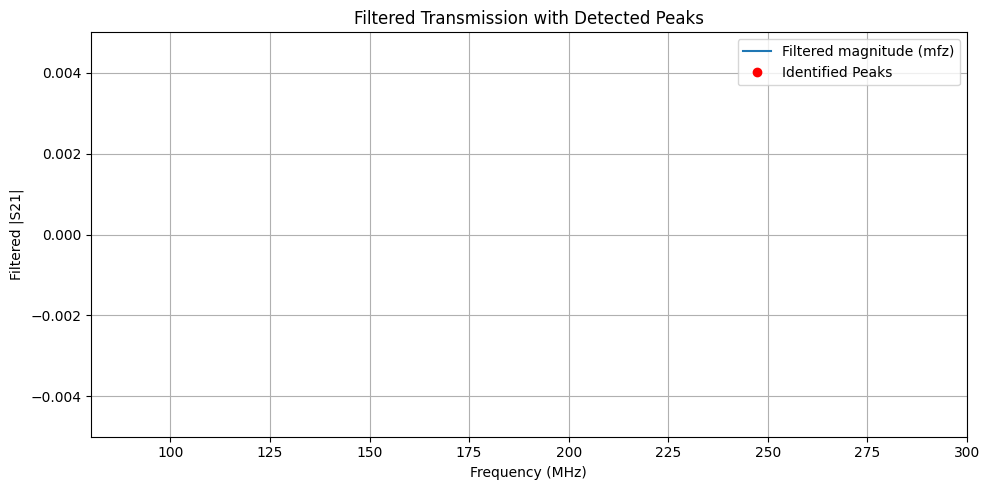

In [3]:
for index, pcb_freq in enumerate(freq_list): 
    freqs_ghz = pcb_freq/1e9
    z = s21_real[index] + 1j*s21_imag[index]
    peak_search(freqs_ghz, z)
    plot_range = [80, 300]
    plot_range_y = [-0.005, 0.005]
    plot_filtered_trace_with_peaks(freqs_ghz, s21_list[index], plot_range, plot_range_y, fwindow=5e-4, start_f=60*1e-3, stop_f=None, nsig=1)